In [1]:
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [4]:
# Loading data 

import h5py

h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

Checking few contents of features and labels of one example from the images

In [6]:
X_train[:1]    

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [7]:
y_train[:1]

array([2], dtype=uint8)

In [9]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [10]:
y_test[:1]

array([1], dtype=uint8)

# Data Visualisation and preprocessing 

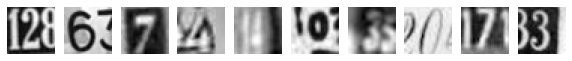

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [12]:
# Checking the shape of the data

X_train.shape

(42000, 32, 32)

In [13]:
y_train.shape

(42000,)

Need to reshape the X_train and X_test so that the same can be fed for model building. Currently we have a 3D tensor and we need to feed a 2D tensor into the model.

We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [14]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [15]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


# Model Training & Evaluation using Neural Network

In [16]:
# Building the neural network model, fitting the training data, testing it and providing model summary.

# Define model 

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [17]:
# build the model
model = nn_model()

2022-08-07 19:27:20.212616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

In [19]:
# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 3s - loss: 2.2896 - accuracy: 0.1212 - val_loss: 2.1854 - val_accuracy: 0.2102 - 3s/epoch - 23ms/step
Epoch 2/100
140/140 - 2s - loss: 1.9757 - accuracy: 0.2903 - val_loss: 1.7610 - val_accuracy: 0.3828 - 2s/epoch - 12ms/step
Epoch 3/100
140/140 - 1s - loss: 1.6575 - accuracy: 0.4300 - val_loss: 1.5686 - val_accuracy: 0.4667 - 1s/epoch - 10ms/step
Epoch 4/100
140/140 - 1s - loss: 1.4767 - accuracy: 0.5050 - val_loss: 1.4409 - val_accuracy: 0.5104 - 1s/epoch - 9ms/step
Epoch 5/100
140/140 - 1s - loss: 1.3751 - accuracy: 0.5443 - val_loss: 1.3745 - val_accuracy: 0.5448 - 1s/epoch - 9ms/step
Epoch 6/100
140/140 - 1s - loss: 1.3018 - accuracy: 0.5745 - val_loss: 1.2409 - val_accuracy: 0.6096 - 1s/epoch - 9ms/step
Epoch 7/100
140/140 - 1s - loss: 1.2444 - accuracy: 0.5985 - val_loss: 1.1945 - val_accuracy: 0.6266 - 1s/epoch - 9ms/step
Epoch 8/100
140/140 - 1s - loss: 1.1651 - accuracy: 0.6288 - val_loss: 1.2260 - val_accuracy: 0.6053 - 1s/epoch - 9ms/step
Epoch 9/100
1

In [20]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.677457332611084
Accuracy: 0.8133888840675354


Text(0.5, 1.0, 'Training and validation loss')

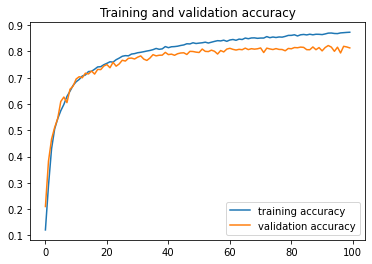

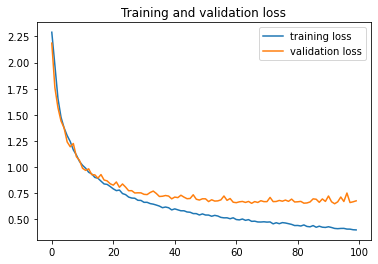

In [21]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 81.33 %.

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.